<a href="https://colab.research.google.com/github/Srinidi-V/Machine-Learning-algorithms/blob/main/Dataset_simple_analysis_and_Convex_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Dataset of consideration
dataset = '/content/drive/My Drive/dataset.xlsx'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import math
import matplotlib.pyplot as plt

In [3]:
#Importing the dataset
import pandas as pd
data = pd.read_excel(dataset)
data = data.dropna()
data.tail()

,SNO,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


# 1. **Mean**

In [5]:
#Finding mean
d = data.drop(['SNO'],axis=1)
d.mean()

TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         14.0225
dtype: float64

# 2. **Median**

In [6]:
#Finding median
d.median()

TV           149.75
Radio         22.90
Newspaper     25.75
Sales         12.90
dtype: float64

# 3. **Standard** **deviation** 

In [7]:
#Finding standard deviation
d.std()

TV           85.854236
Radio        14.846809
Newspaper    21.778621
Sales         5.217457
dtype: float64

# 4. **Covariance**

In [8]:
def covariance(x,y):
    mx = x.mean()
    my = y.mean()
    sums = ((x - mx)*( y -my)).sum()
    return sums/(len(data)-1)

In [9]:
cv = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]
features = ['TV','Radio','Newspaper','Sales']
for i in range(len(features)):
    for j in range(len(features)):
        cv[i][j] = covariance(d[features[i]],d[features[j]])

In [10]:
cov = pd.DataFrame(cv,index = features, columns = features)
cov

,TV,Radio,Newspaper,Sales
TV,7370.949893,69.862492,105.919452,350.390195
Radio,69.862492,220.427743,114.496979,44.635688
Newspaper,105.919452,114.496979,474.308326,25.941392
Sales,350.390195,44.635688,25.941392,27.221853


# 5. **Correlation**

In [11]:
def correlation(x,y):
    mx = x.mean()
    my = y.mean()
    num = len(data)*(x*y).sum() - ((x.sum())*(y.sum()))
    den = math.sqrt((len(data)*(x**2).sum() - ((x.sum())**2))*(len(data)*(y**2).sum() - ((y.sum())**2)))
    return num/den

In [12]:
cr = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]
for i in range(len(features)):
    for j in range(len(features)):
        cr[i][j] = correlation(d[features[i]],d[features[j]])

In [13]:
cor = pd.DataFrame(cr,index = features, columns = features)
cor

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


# 6. **Skewness**

In [14]:
#Finding skew values
skew_value = d.skew(axis=0)
skew_value

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales        0.407571
dtype: float64

Inference
1. TV - Negative skew
2. Radio - Fairly symmetrical
3. Newspaper - Moderately, positive skew
4. Sales - Slight positive skew

# 7. **Kurtosis**

In [15]:
#Finding kurtosis
kurtosis = d.kurt(axis=0)
kurtosis

TV          -1.226495
Radio       -1.260401
Newspaper    0.649502
Sales       -0.408869
dtype: float64

All are platykurtic  - flat distributions which are moderately spread out 
Excess = kurtosis - 3
In this case, excess value is very high.


# 8. **Boxplot**

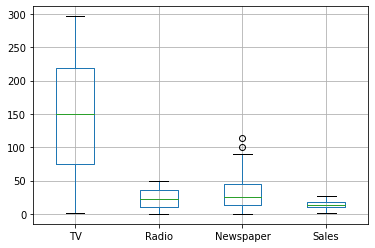

In [16]:
#Box plot
d.boxplot()

It seems like a mild outlier

# 9. **Scatter Plot**

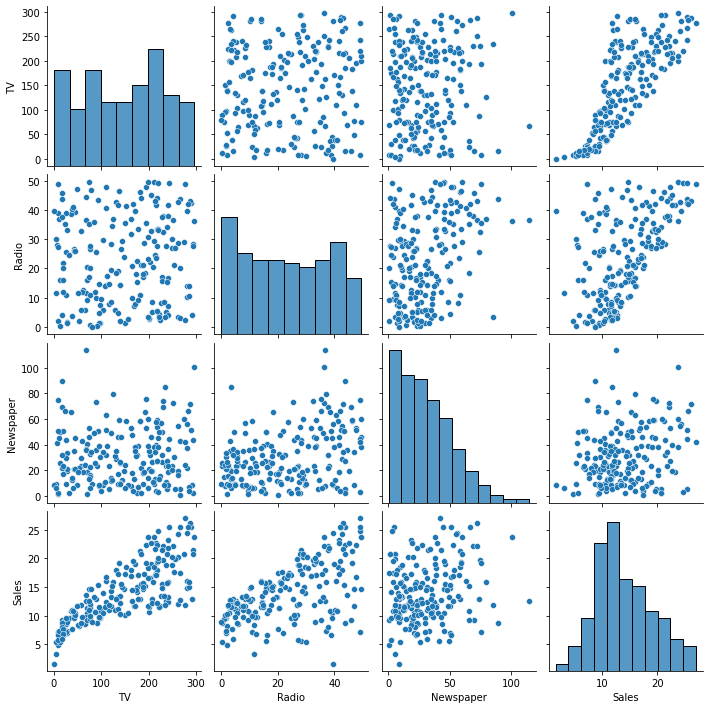

In [17]:
#Scatter plot
import seaborn as sns
ax = sns.pairplot(d)

# 10. **Heat map**

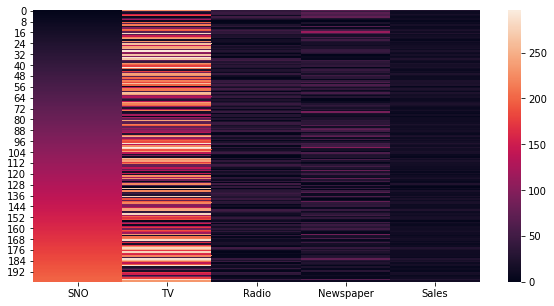

In [18]:
#Heat map
ax = plt.subplots(figsize = (10,5))
sns.heatmap(data)

# **PART - 2**

In [19]:
from sympy import *
from sympy.plotting import plot
import math
import matplotlib.pyplot as plt

In [20]:
#input for the function whose roots are to be determined is taken
def function_to_solve():
    user_input = input("Enter the function whose roots are to be found:")
    expr = sympify(user_input)
    return expr

In [21]:
def der_fun(g):
    x = Symbol('x')
    g = sympify(g)
    d = Derivative(g,x)
    d1 = d.doit()
    d = Derivative(d1,x)
    return (sympify(d.doit()))

In [22]:
def fun(x1,g):
    x = var('x')
    return g.subs(x,x1)

This is for dynamic inputs - the graph before and the differentiated function is plotted and the value of second derivative of the initially provided function is verified - 
1. if g ( = f") >=0 -- convex function
2. else concave function


Enter the function whose roots are to be found:x**3


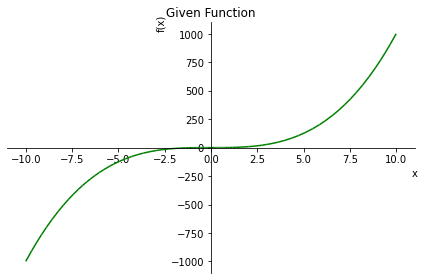

6*x


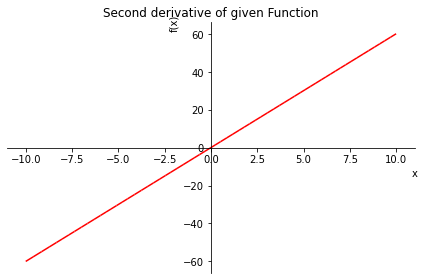

In [23]:
#FOR DYNAMIC INPUTS
#FOR EXPONENT TO WORK - GIVE FLOAT VALUE
f = function_to_solve()
x = Symbol('x')
plot(f,line_color='green',title="Given Function")
g = der_fun(f)
print(g)
plot(g,line_color='red',title="Second derivative of given Function")

# **log(x)**

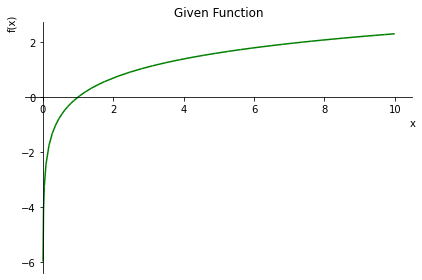

-1/x**2


In [24]:
f = log(x)
x = Symbol('x')
plot(f,line_color='green',title="Given Function")
g = der_fun(f)
print(g)

Observation - this is a concave function in (-inf,inf)

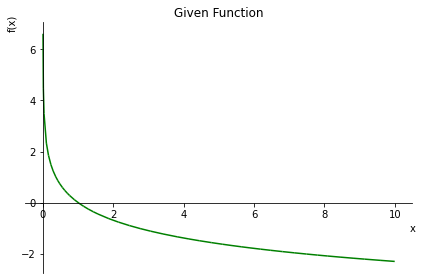

x**(-2)


In [26]:
f = -1*log(x)   #-f(x)
x = Symbol('x')
plot(f,line_color='green',title="Given Function")
g = der_fun(f)
print(g)

Observation - this is a convex function in (-inf,inf)

# x*log(x) 

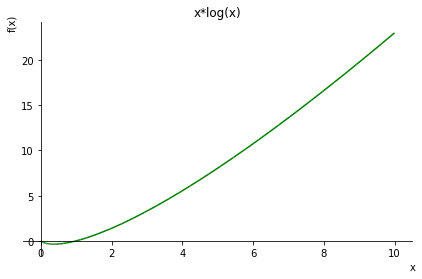

1/x


In [27]:
f = x*log(x)
x = Symbol('x')
plot(f,line_color='green',title="x*log(x)")
g = der_fun(f)
print(g)

Observation - this is a convex function in (0,inf)

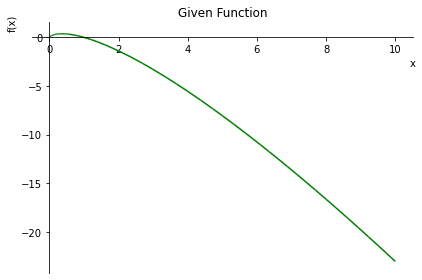

-1/x


In [28]:
f = -1*x*log(x)   #-f(x)
x = Symbol('x')
plot(f,line_color='green',title="Given Function")
g = der_fun(f)
print(g)

Observation - this is a concave function in (0,inf)

# **exp(x)**

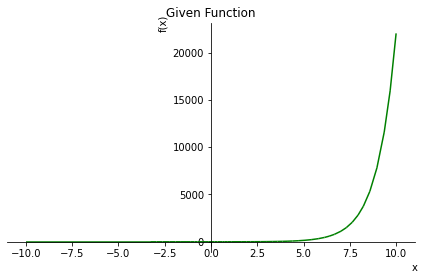

exp(x)


In [29]:
f = exp(x)
x = Symbol('x')
plot(f,line_color='green',title="Given Function")
g = der_fun(f)
print(g)

Observation - this is a convex function in (-inf,inf)

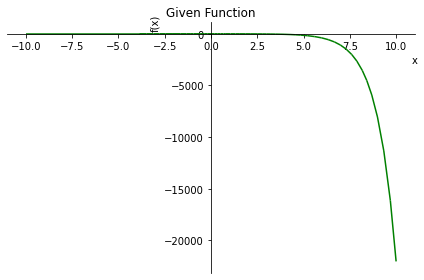

-exp(x)


In [30]:
f = -1*exp(x)   #-f(x)
x = Symbol('x')
plot(f,line_color='green',title="Given Function")
g = der_fun(f)
print(g)

Observation - this is a concave function in (-inf,inf)

# **|x|**

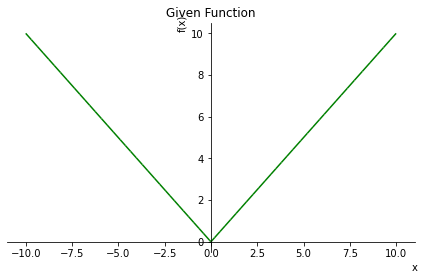

In [31]:
f = abs(x)
x = Symbol('x')
plot(f,line_color='green',title="Given Function")

Observation - this is a convex function in (-inf,inf)

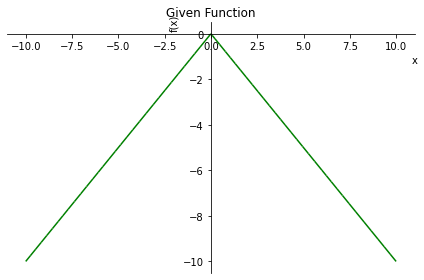

In [32]:
f = -1*abs(x)   #-f(x)
x = Symbol('x')
plot(f,line_color='green',title="Given Function")

Observation - this is a concave function in (-inf,inf)

# **x^r**

Enter r value:6


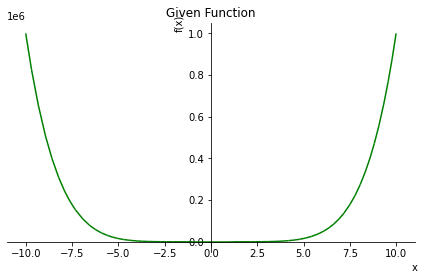

30*x**4


In [33]:
r= int(input("Enter r value:"))
x = Symbol('x')
f = sympify(x**r)
plot(f,line_color='green',title="Given Function")
g = der_fun(f)
print(g)

Observation - these are convex functions

Enter r value:3


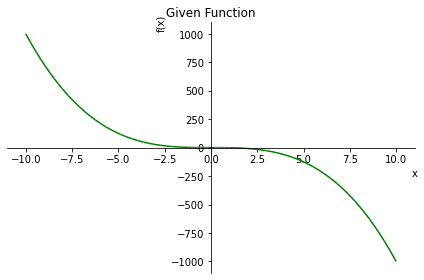

-6*x


In [34]:
r= int(input("Enter r value:"))
x = Symbol('x')
f = sympify(-1*x**r)    #-f(x)
plot(f,line_color='green',title="Given Function")
g = der_fun(f)
print(g)

Observation - these are concave functions

# **1/x^r**

Enter r value:2


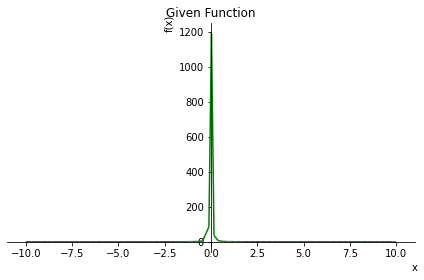

6/x**4


In [35]:
r= int(input("Enter r value:"))
x = Symbol('x')
f = sympify(1/x**r)
plot(f,line_color='green',title="Given Function")
g = der_fun(f)
print(g)

Observation - these are convex functions

Enter r value:2


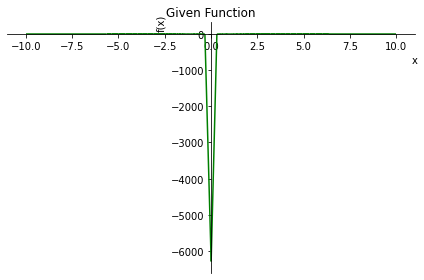

-6/x**4


In [36]:
r= int(input("Enter r value:"))
x = Symbol('x')
f = sympify(-1/x**r)    #-f(x)
plot(f,line_color='green',title="Given Function")
g = der_fun(f)
print(g)

Observation - these are concave functions

# **Sum of two Convex functions**

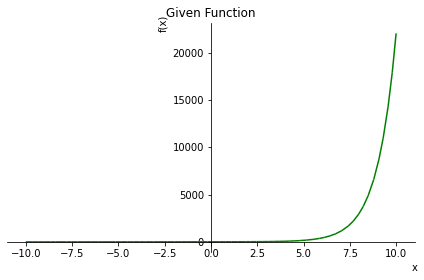

exp(x)


In [37]:
f = x + exp(x)
x = Symbol('x')
plot(f,line_color='green',title="Given Function")
g = der_fun(f)
print(g)

Observation - these are convex functions too